# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 13s 0us/step


In [4]:
# Your code here
import numpy as np

print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)
print("Number of classes:", len(np.unique(y_train)))

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)
Number of classes: 100


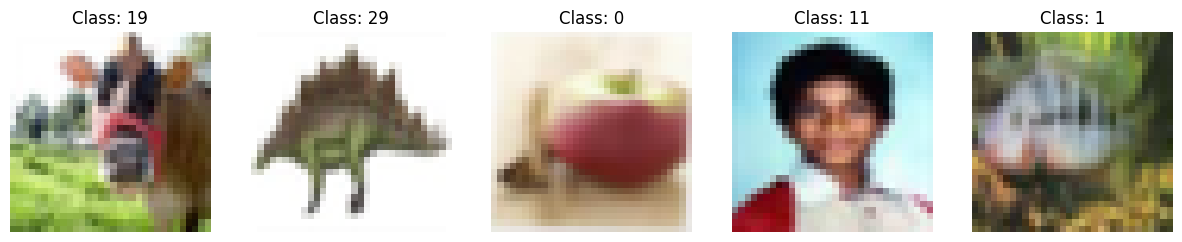

In [5]:
import matplotlib.pyplot as plt

def display_examples(x,y,num_examples=5):
  fig, axes = plt.subplots(1, num_examples, figsize=(15,15))
  for i in range(num_examples):
    ax = axes[i]
    ax.imshow(x[i])
    ax.set_title(f"Class: {y[i][0]}")
    ax.axis('off')
  plt.show()

display_examples(x_train, y_train)

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
# Your code here

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

#normalize the images
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

#convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split the training set into training and test
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes to verify
print("Training data shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", x_val.shape)
print("Validation labels shape:", y_val.shape)
print("Test data shape:", x_test.shape)
print("Test labels shape:", y_test.shape)

Training data shape: (40000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation data shape: (10000, 32, 32, 3)
Validation labels shape: (10000, 100)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here
model = Sequential()

# Convolution layer 1
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu', padding='same', input_shape = (32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution layer 2
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Convolution layer 3
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

# flatten the output
model.add(Flatten())

# Fully connected layer 1
model.add(Dense(units=256, activation='relu'))

# Fully connected layer 2
model.add(Dense(units=128, activation='relu'))

# Output layer
model.add(Dense(units=100, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> _The appropriate loss function is Categorical Crossentropy. It measures the distance between the true label distribution and predicted label distribution, minimizing the model's prediction error._____
- <b>Optimizer:</b> __Adam is an effective optimizer for this model. It works well with large datasets.____

In [8]:
from keras import optimizers

model.compile(optimizer=optimizers.Adam(learning_rate=0.001),loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [9]:
# Your code here
from keras.callbacks import EarlyStopping

# Set the batch size and number of epochs
batch_size = 32
epochs = 50

# Define early stopping callback, continue for 5 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(x_val, y_val)
print(f'Validation Loss: {val_loss:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')


Epoch 1/50
1250/1250 [==============================] - 109s 85ms/step - loss: 3.9109 - accuracy: 0.0959 - val_loss: 3.3945 - val_accuracy: 0.1812
Epoch 2/50
1250/1250 [==============================] - 108s 86ms/step - loss: 3.1420 - accuracy: 0.2271 - val_loss: 2.9531 - val_accuracy: 0.2619
Epoch 3/50
1250/1250 [==============================] - 110s 88ms/step - loss: 2.7277 - accuracy: 0.3060 - val_loss: 2.7159 - val_accuracy: 0.3093
Epoch 4/50
1250/1250 [==============================] - 107s 86ms/step - loss: 2.4322 - accuracy: 0.3642 - val_loss: 2.6200 - val_accuracy: 0.3366
Epoch 5/50
1250/1250 [==============================] - 107s 85ms/step - loss: 2.2020 - accuracy: 0.4158 - val_loss: 2.5479 - val_accuracy: 0.3609
Epoch 6/50
1250/1250 [==============================] - 110s 88ms/step - loss: 1.9829 - accuracy: 0.4622 - val_loss: 2.5144 - val_accuracy: 0.3772
Epoch 7/50
1250/1250 [==============================] - 108s 86ms/step - loss: 1.7891 - accuracy: 0.5106 - val_loss: 2

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> Accuracy improved from 10% to 64% over 10 epochs. The final validation accuracy is 37.72%. This indicates that 37.72% of the images in the validation set were correctly classified.
- <b>Other metric:</b> _F1 Score_____
- <b>Reason for selection:</b> _F1 Score gives a better overall performance metric is there is a class imbalance.__
- <b>Value of metric:</b> __0.37____
- <b>Interpretation of metric value:</b> _0.37 F1 score suggests that the model has moderate performance. It is better than random guessing but there is room for improvement.____

In [12]:
# Your code here
from sklearn.metrics import f1_score

y_pred = model.predict(x_test)  # Model prediction
y_pred_classes = y_pred.argmax(axis=-1)  # Convert probabilities to class labels

# Convert one-hot encoded labels to class labels
y_test_classes = y_test.argmax(axis=-1)  # Convert to class labels

# Compute F1-Score
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
print(f'F1-Score: {f1:.4f}')


313/313 [==============================] - 10s 32ms/step
F1-Score: 0.3734


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

The plot shows that the validation accuracy is higher than the training accuracy at the beginning and then gradually falls behind the training accuracy. The result suggests overfitting where the model performs better on the training data and performs weaker on performance it hasn't seen.

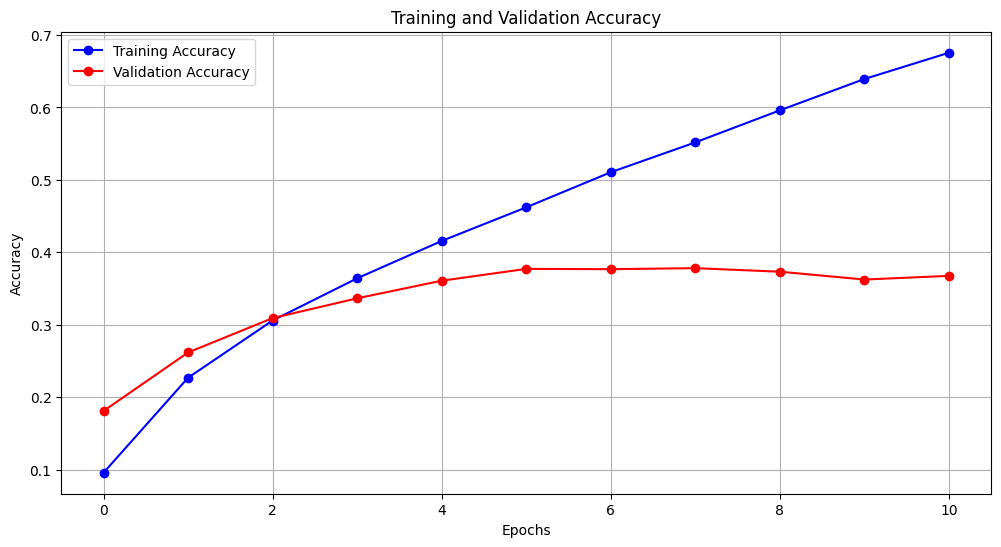

In [14]:
# Your code here
# Plot the training and validation accuracy:
import matplotlib.pyplot as plt

# `history` is the History object returned by the first call to model.fit()

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], 'bo-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()



## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.

To improve my model, I will be using the data augmentation technique.
Data augmentation is a technique to artificially increase the size of the training dataset by applying random transformations to the existing images. It can help improve the model's generalization capability and reduce overfitting.

- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [16]:
# applying data augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss',  # or 'val_accuracy'
                               patience=10,         # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

# Create an instance of ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the data generator to your training data
datagen.fit(x_train)

# Train the model with augmented data and EarlyStopping callback
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    epochs=50,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping])



Epoch 1/50
1250/1250 [==============================] - 134s 107ms/step - loss: 2.2699 - accuracy: 0.4034 - val_loss: 2.3990 - val_accuracy: 0.3964
Epoch 2/50
1250/1250 [==============================] - 133s 106ms/step - loss: 2.2251 - accuracy: 0.4109 - val_loss: 2.2449 - val_accuracy: 0.4273
Epoch 3/50
1250/1250 [==============================] - 138s 110ms/step - loss: 2.2226 - accuracy: 0.4117 - val_loss: 2.2063 - val_accuracy: 0.4294
Epoch 4/50
1250/1250 [==============================] - 137s 110ms/step - loss: 2.2079 - accuracy: 0.4169 - val_loss: 2.3033 - val_accuracy: 0.4165
Epoch 5/50
1250/1250 [==============================] - 138s 111ms/step - loss: 2.1965 - accuracy: 0.4197 - val_loss: 2.3396 - val_accuracy: 0.4108
Epoch 6/50
1250/1250 [==============================] - 137s 109ms/step - loss: 2.1889 - accuracy: 0.4206 - val_loss: 2.3060 - val_accuracy: 0.4201
Epoch 7/50
1250/1250 [==============================] - 136s 109ms/step - loss: 2.1737 - accuracy: 0.4248 - val_

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.


- Compare the accuracy and other selected metric on the test set to the results you obtained before.


- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

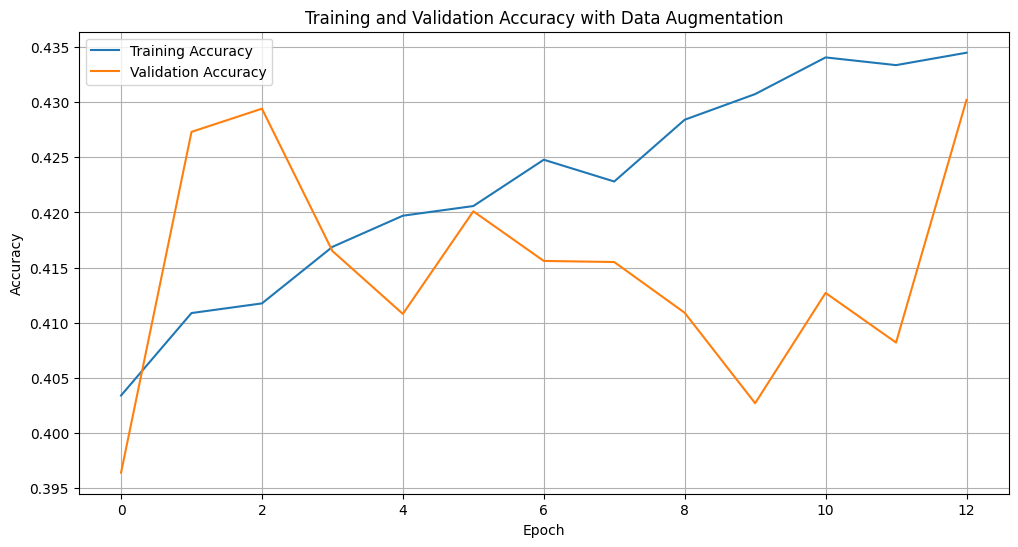

In [19]:
# Your code here
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned from model.fit() with data augmentation
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy with Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()



313/313 [==============================] - 7s 24ms/step


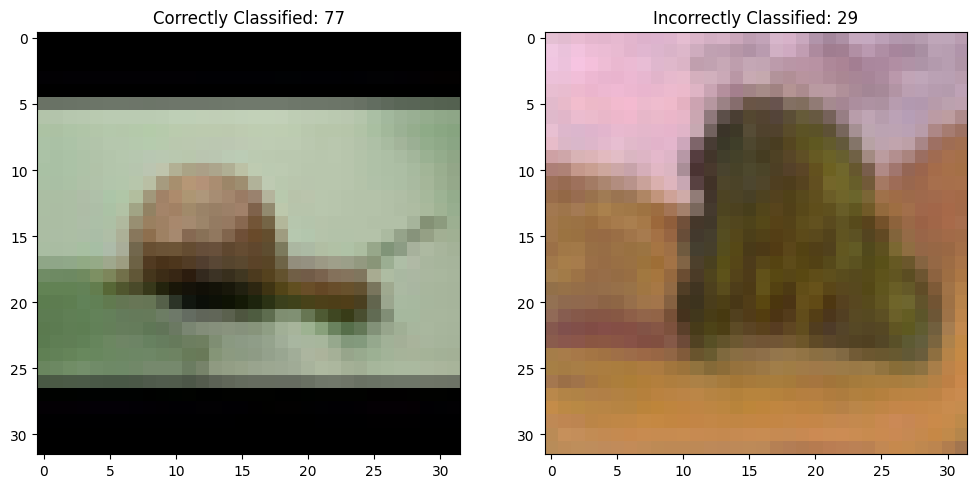

Correctly Classified Image Probabilities:
[6.61370251e-03 1.01915956e-03 2.42389715e-03 2.32477207e-03
 1.85176414e-02 6.85042329e-03 4.72698826e-03 3.12158521e-02
 1.60112213e-05 6.24698354e-04 7.87132699e-03 1.14438233e-04
 1.43662792e-05 5.00120550e-05 4.04105196e-03 8.66910256e-03
 2.95602193e-04 1.18699745e-06 4.37803660e-03 2.65322247e-04
 6.37638150e-04 1.07781016e-04 1.28988805e-03 2.38833542e-04
 6.05300032e-02 7.96470884e-03 2.68380232e-02 1.68967363e-03
 7.57506257e-03 9.25032480e-04 1.88913782e-05 3.52415373e-05
 1.43547868e-02 1.05789268e-05 1.77967042e-04 3.28194350e-04
 1.65567908e-03 3.91909452e-05 1.09151908e-04 2.26721822e-05
 2.64572725e-03 3.78837460e-04 8.70267249e-05 5.42620779e-04
 3.84453358e-03 1.32481917e-03 2.68837553e-04 1.38534320e-04
 2.40234986e-05 2.34371811e-07 6.78766845e-03 1.34300510e-03
 1.88673239e-05 1.17462660e-05 1.54600979e-03 2.87274718e-02
 1.10133342e-03 1.57359421e-01 2.59208813e-04 2.56444881e-04
 6.50795391e-06 2.58503162e-04 3.59487021e-

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Get model predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class labels
y_test_classes = y_test.argmax(axis=-1)  # Convert one-hot to class labels

# Select an image that the model classified correctly
correct_indices = np.where(y_pred_classes == y_test_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_test_classes)[0]

# Randomly pick one correctly classified and one incorrectly classified image
correct_index = np.random.choice(correct_indices)
incorrect_index = np.random.choice(incorrect_indices)

# Plot correctly classified image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_index])
plt.title(f'Correctly Classified: {y_pred_classes[correct_index]}')

# Plot incorrectly classified image
plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_index])
plt.title(f'Incorrectly Classified: {y_pred_classes[incorrect_index]}')

plt.show()

# Print classification probabilities for each
print("Correctly Classified Image Probabilities:")
print(y_pred[correct_index])

print("\nIncorrectly Classified Image Probabilities:")
print(y_pred[incorrect_index])


### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The model's validation accuracy improved from 0.3772 to 0.4302 after applying data augmentation. This indicates a positive effect on the model's generalization ability.

Data augmentation creates a more diverse training set by introducing variation in input images. It helps to prevent overfitting and allows the model to perform better on unseen data.

Yes, there is room for improvement. Whil accuracy has improved, there might still be class imbalance issue or insufficient feature learning.

I would consider technique like regularization to reduce overfitting or ensemble methods in the future. These approaches can further enhance the model's accuracy and robustness.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.